Last modified: Sept 2nd, 2025


## QLT electrostatic perpendicular instability 
#### [V. Roytershteyn and G. L. Delzanno. *Nonlinear coupling of whistler waves to oblique electrostatic turbulence enabled by cold plasma*. Physics of Plasmas, 28(4):042903, 04 2021](https://pubs.aip.org/aip/pop/article-abstract/28/4/042903/263604/Nonlinear-coupling-of-whistler-waves-to-oblique?redirectedFrom=fulltext)

Author: Opal Issan (oissan@ucsd.edu)

In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('../../../../')))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from QLT_equations.testperp import dydt, get_omega_vec
from QLT_equations.perpQLT import dispersion_relation

In [3]:
# import for plotting purposes
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

## Electrostatic perpendicular QLT + reduced dispersion relation equations


In [4]:
# normalization 
# time is normalized to the electron cyclotron frequency 1/Omega_ce
# space is normalized to electron inertial length d_e
n_c = 0.8 # n^e_0
omega_0 = 0.5 # Omega_ce
k_0 = 1. # d_e
omega_pe = 4 # Omgea_{ce}


alpha_perp_c = 0.0079 # d_e x Omega_ce
alpha_i =  0.0079 / np.sqrt(1836) # d_e x Omega_ce

v_0 = 0.65 * alpha_perp_c # d_e x Omega_ce
omega_pi = omega_pe / np.sqrt(1836) # Omega_ce

# initial conditions
dB0 = 4e-4 # (v_0**2) * 4 * np.pi * (k_0**2) / (omega_0**2) *((omega_0 - 1)**2) # d_{e}^3 Omega_{ce}^2 m_{e} n_{e}
E0 = 1e-11
K0 = (alpha_perp_c**2 / 2) * n_c 
T0 = (alpha_perp_c**2 / 2) 

# k vector
k_vec = np.linspace(160, 210, 50)
dk = np.abs(k_vec[1] - k_vec[0])

# max time 
t_max = 600

In [5]:
(v_0**2) * 4 * np.pi

0.000331352887792811

In [6]:
sol_ = get_omega_vec(k_vec=k_vec, omega_pe=omega_pe, omega_pi=omega_pi, 
                     v_0=v_0, alpha_i=alpha_i, alpha_perp_c=alpha_perp_c, 
                     n_c=n_c, omega_0=omega_0)

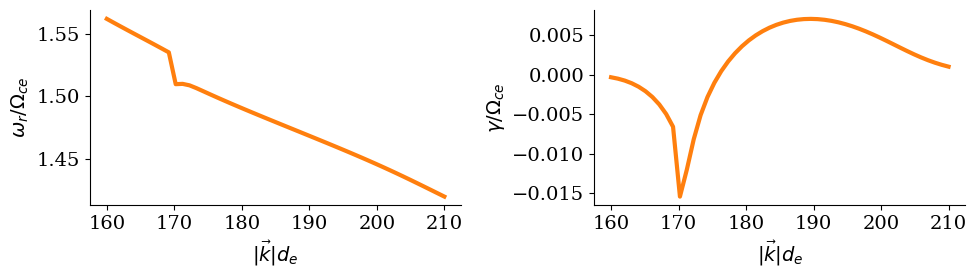

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3))
ax[0].plot(k_vec, sol_.real, linewidth=3, color="tab:orange")
ax[0].set_ylabel('$\omega_r/\Omega_{ce}$')
ax[0].set_xlabel(r"$|\vec{k}|d_{e}$")

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[1].plot(k_vec, sol_.imag, color="tab:orange", linewidth=3)
ax[1].set_ylabel('$\gamma/\Omega_{ce}$', rotation=90)
ax[1].set_xlabel(r"$|\vec{k}|d_{e}$")
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

plt.tight_layout()

# QLT simulation 

In [8]:
dE_init = E0 * np.ones(len(k_vec))

# simulate 
result = scipy.integrate.solve_ivp(fun=dydt, t_span=[0, t_max], 
                                   y0=np.concatenate(([K0], [T0], [dB0], [v_0**2], dE_init)), 
                                   args=(k_vec, omega_pe, omega_pi, k_0, alpha_i, n_c, dk, omega_0, "perp_gamma", True),
                                   atol=1e-8, rtol=1e-8, method='LSODA')

t =  0.0
max gamma =  0.007081117882531297
t =  0.05999999999982837
max gamma =  0.007081095986662329
t =  0.05999999999982837
max gamma =  0.00708109595570744
t =  0.11999999999965674
max gamma =  0.00708107402800297
t =  0.11999999999965674
max gamma =  0.007081073997044629
t =  56.82194382275158
max gamma =  0.007045616402486192
t =  56.82194382275158
max gamma =  0.007045013460770683
t =  14.295485955687637
max gamma =  0.007074990911939146
t =  14.295485955687637
max gamma =  0.007074982435949235
t =  28.470971911375617
max gamma =  0.007067004968363615
t =  28.470971911375617
max gamma =  0.007066967916848806
t =  42.646457867063596
max gamma =  0.007056877861702433
t =  42.646457867063596
max gamma =  0.007056797607218025
t =  43.94714736809148
max gamma =  0.007055728303668725
t =  43.94714736809148
max gamma =  0.007055727789634221
t =  45.24783686911936
max gamma =  0.00705465849077113
t =  45.24783686911936
max gamma =  0.007054658315674779
t =  46.54852637014724
max gamma =

In [10]:
len(result.t)

35

# energy partition 

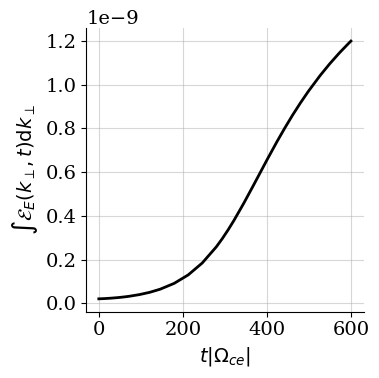

In [11]:
fig, ax = plt.subplots(figsize=(4, 4))
potential_energy = np.sum(result.y[4:, :], axis=0)*dk/(8*np.pi)
ax.plot(result.t, potential_energy, color="black", linewidth=2)
ax.set_xlabel(r'$t|\Omega_{ce}|$')
ax.set_ylabel(r'$\int \mathcal{E}_{E}(k_{\perp}, t) \mathrm{d} k_{\perp}$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig("../../figs/secondary_QLT/perp/perp_potential_energy.png", dpi=300, bbox_inches='tight')

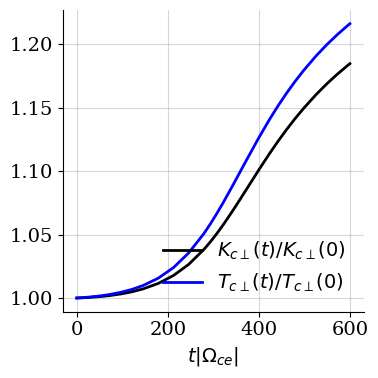

In [12]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(result.t, result.y[0, :]/result.y[0, 0], color="black", linewidth=2, label=r"$K_{c\perp}(t)/K_{c\perp}(0)$")
ax.plot(result.t, result.y[1, :]/result.y[1, 0], color="blue", linewidth=2, label="$T_{c\perp}(t)/T_{c\perp}(0)$")

legend = ax.legend(loc='lower right', ncols=1, fancybox=False, shadow=False, fontsize=14)
legend.get_frame().set_alpha(0)
ax.set_xlabel("$t|\Omega_{ce}|$")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig("../../figs/secondary_QLT/perp/perp_kinetic_energy.png", dpi=300, bbox_inches='tight')

In [13]:
result.y[1, -1]/result.y[1, 0]

1.2163189716614413

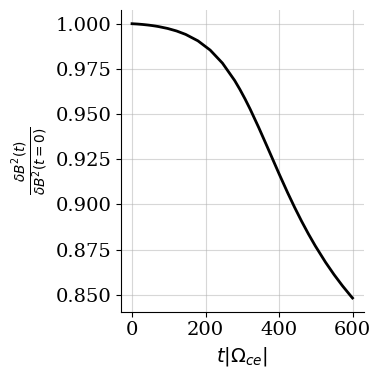

In [14]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(result.t, result.y[2, :]/result.y[2, 0], color="black", linewidth=2)

ax.set_xlabel("$t|\Omega_{ce}|$")
ax.set_ylabel(r"$\frac{\delta B^2(t)}{\delta B^2(t=0)}$")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig("../../figs/secondary_QLT/perp/perp_magnetic_energy.png", dpi=300, bbox_inches='tight')

In [15]:
1-result.y[2, -1]/result.y[2, 0]

0.1518145817829618

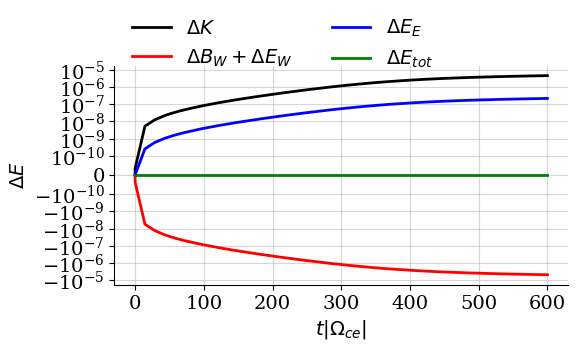

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))
kinetic_energy = result.y[0, :]
potential_energy = np.sum(k_vec[None, :] * result.y[4:, :].T, axis=1) * dk/8/np.pi
magnetic_energy = result.y[2, :]/8/np.pi * (1 + (omega_0 / k_0 / (1-omega_0)) ** 2)
total_energy = kinetic_energy + magnetic_energy + potential_energy 

ax.plot(result.t, kinetic_energy - kinetic_energy[0], color="black", linewidth=2, label="$\Delta K$")
ax.plot(result.t, magnetic_energy - magnetic_energy[0], color="red", linewidth=2, label="$\Delta B_{W} + \Delta E_{W}$")
ax.plot(result.t, potential_energy - potential_energy[0], color="blue", linewidth=2, label="$\Delta E_{E}$")
ax.plot(result.t, total_energy - total_energy[0], color="green", linewidth=2, label="$\Delta E_{tot}$")

ax.set_yscale("symlog", linthresh=1e-10)
ax.set_xlabel(r'$t|\Omega_{ce}|$')
ax.set_ylabel(r'$\Delta E$')

legend = ax.legend(loc='upper left', ncols=2, fancybox=False, shadow=False, fontsize=14, bbox_to_anchor=(0., 1.3))
legend.get_frame().set_alpha(0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5) 
plt.tight_layout()

#plt.savefig("../../figs/secondary_QLT/perp/perp_conservation_of_energy.png", dpi=300, bbox_inches='tight')

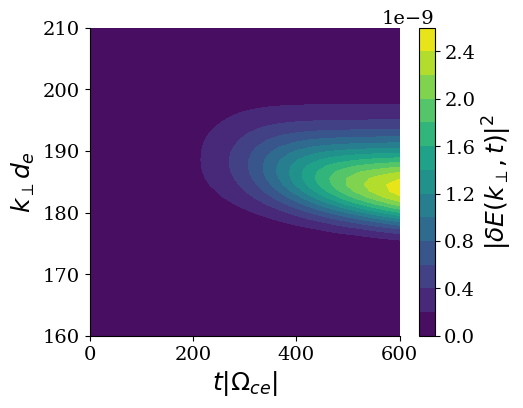

In [17]:
fig, ax = plt.subplots(figsize=(5, 4))
pos = ax.contourf(result.t, k_vec, result.y[4:], cmap="viridis",  levels=15)
cbar = fig.colorbar(pos)

ax.set_xlabel(r'$t|\Omega_{ce}|$', fontsize=18)
ax.set_ylabel(r'$k_{\perp} d_{e}$', fontsize=18)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

cbar.set_label(r"$|\delta E(k_{\perp}, t)|^2$", fontsize=18)
#plt.savefig("../../figs/secondary_QLT/perp/electric_energy_spectrum.png", dpi=300, bbox_inches='tight')

# save results 

In [ ]:
np.save("/Users/oissan/PycharmProjects/QLT_whistler/data/2D3V_low_anisotropy_VPIC/2D-plot-example/perpendicular_T_perp.npy", result.y[1, :])
np.save("/Users/oissan/PycharmProjects/QLT_whistler/data/2D3V_low_anisotropy_VPIC/2D-plot-example/perpendicular_dB.npy", result.y[2, :])
np.save("/Users/oissan/PycharmProjects/QLT_whistler/data/2D3V_low_anisotropy_VPIC/2D-plot-example/perpendicular_t.npy", result.t)